In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline
import seaborn as sns
sns.set_palette('muted')
import time
import os

import xgboost as xgb
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.utils import check_array
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load train and test data
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

(train.shape, test.shape)
# encode categorical data
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

((4209, 377), (4209,), (4209, 377))

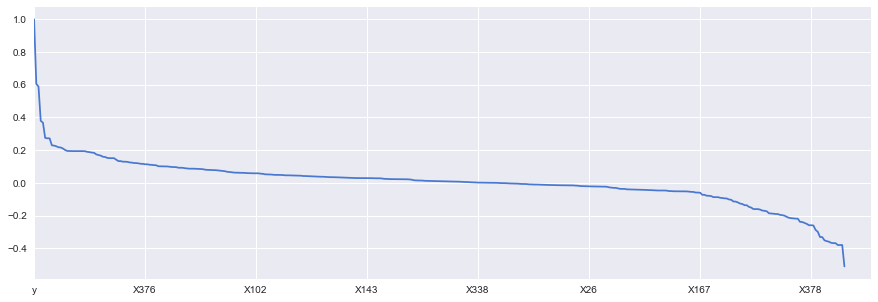

In [19]:
corrmat = train.corr()
plt.figure(figsize=(15,5))
corrmat['y'].sort_values(ascending=False).plot()

In [20]:
# get X and y for training
X_train = train.drop('y', axis=1)
y_train = train['y']

# get X for testing
X_test = test
X_train.shape, y_train.shape, X_test.shape

((4209, 377), (4209,), (4209, 377))

In [28]:
sp = SelectPercentile(score_func=f_regression)
feats = sp.fit_transform(X_train, y_train)

In [33]:
feats

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ..., 
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])